# Question-2

In [18]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Part-1

In [19]:
def linContrastStretching(im,a,b):
    im_min = np.amin(im)
    im_max = np.amax(im)
    out = ((b-a)/(im_max - im_min))*(im - im_min) + a
    return out.astype(np.uint8)

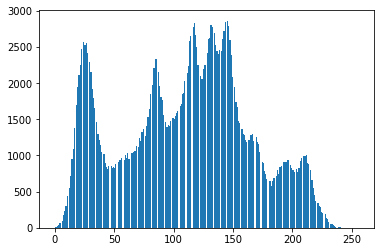

In [20]:
img = cv2.cvtColor(cv2.imread('./../input_data/lena.jpg'), cv2.COLOR_BGR2GRAY)
out = linContrastStretching(img,0,255)
plt.hist(out.ravel(),256,[0,256])
plt.show()

In [21]:
k = 10
u,c = np.unique(img,return_counts=True)
sort_index = np.argsort(c)
inp1 = u[sort_index[0:k]].reshape(k,1)

out1 = np.repeat(np.repeat(inp1,1000//k,axis=0),100,axis = 1).T
u,c = np.unique(out,return_counts=True)
sort_index = np.argsort(c)
inp2 = u[sort_index[0:k]].reshape(k,1)
out2 = np.repeat(np.repeat(inp2,1000//k,axis=0),100,axis = 1).T

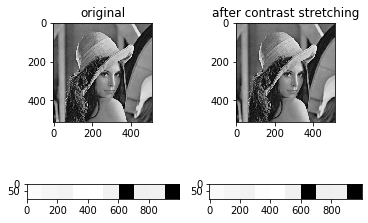

In [22]:
fig = plt.figure()
fig.add_subplot(221)
plt.title('original')
plt.imshow(img,'gray',norm=None) 
plt.subplot(2,2,2)
plt.title('after contrast stretching')
plt.imshow(out,'gray',norm=None)
plt.subplot(2,2,3)
plt.imshow(out1,'gray',norm=None)
plt.subplot(2,2,4)
plt.imshow(out2,'gray',norm=None)
plt.show()

MOST FREQUENT COLORS AT RIGHT

In the image if we observe it has more pixels having the same intensity values(hair,background circular strip). So there are two black intensities in the top 10 frequent colors. Similarly we have pixels belonging to hat,face with almost same values.So, we have a variety of white pixels.

In [6]:
print("average change in intensity is",(np.sum(img-out))/img.size)
print(np.min(img),np.max(img),"are min and max value of intensity in input image ")

average change in intensity is 29.18222427368164
34 245 are min and max value of intensity in input image 


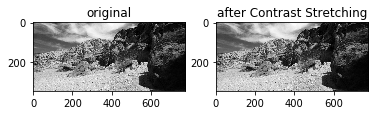

In [7]:
img = cv2.cvtColor(cv2.imread('./../input_data/canyon.png'), cv2.COLOR_BGR2GRAY) 
out = linContrastStretching(img,0,255)
fig = plt.figure()
fig.add_subplot(121)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,2,2)
plt.title('after Contrast Stretching')
plt.imshow(out,'gray')
plt.show()

In [8]:
print("average change in intensity is",np.sum(abs(out-img))/img.size)
print(np.min(img),np.max(img),"are min and max value of intensity in input image ")

average change in intensity is 0.4463885799035966
0 253 are min and max value of intensity in input image 


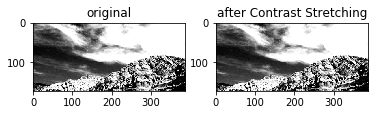

In [9]:
img = cv2.cvtColor(cv2.imread('./../input_data/part1.png'), cv2.COLOR_BGR2GRAY) 
out = linContrastStretching(img,0,255)
fig = plt.figure()
fig.add_subplot(121)
plt.title('original')
plt.imshow(img,'gray') 
plt.subplot(1,2,2)
plt.title('after Contrast Stretching')
plt.imshow(out,'gray')
plt.show()

In [10]:
print("average change in intensity is",np.sum(abs(out-img))/img.size)
print(np.min(img),np.max(img),"are min and max value of intensity in input image ")

average change in intensity is 0.0
0 255 are min and max value of intensity in input image 


Change in the intensity value can be seen for the image **lena.jpg** the initial range varies from the output range i.e., [0,255]. So the intensity values changed. 
But when we see in the last image, **part1.png**, there is no change in intensity values because the initial range and output range are same, no change happens.
This is because when **b = im_max** and **a = im_min**, **(b-a)/(im_max - im_min)** becomes 1 and have no effect on the intensity values since **a = im_min**